# Business Objective

<div style="text-align: justify;">

Banks are obligated to manage their risk when it comes to giving loans reactively and proactively. In order to achieve this, various methods of calculating defaults have been developed over the years. This notebook demonstrates how a bank could potentially segment its clients with the aim of creating Machine Learning Credit Scoring models as needed. The idea is a model trained on specific population performs better than a single one trained on the entire population.

</div>

<div style="text-align: justify;">

Based on the previous statement, four questions are formulated:

* What features are we going to use to split our population?
* How are we going to split our population?
* How many clusters are we supposed to aim in order to make the evaluation sustainable?
* What metric are we using to analyze the segmented model's performance compared to the single one?
* What added value does having more than a model provide to the business?

</div>


# Notebook Initialization

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas configuration
pd.set_option('display.max_columns', None)

Reading dataframe and getting initial information

In [2]:
# getting data from csv file
data = pd.read_csv('datasets/Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")

# showing top 5
data.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,0,0,0.0,0.0,6.0,3772.486272,5450.35,0.0,1,24,4067.03,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,0,0,0.0,0.0,6.0,8389.745000,0.00,0.0,1,24,0.00,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,0,0,0.0,0.0,6.0,1842.695000,0.00,0.0,1,13,0.00,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,0,0,0.0,0.0,6.0,4514.070000,5661.25,0.0,1,24,0.00,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,0,0,0.0,0.0,6.0,7848.908333,0.00,0.0,1,6,0.00,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


# <span style="color:#FF6600; font-weight:bold;">First Question:</span> <span style="color:#6699CC;">What features are we going to use to split our population?</span>


To start with, the business needs to have the capability of quantify its cutoffs so that it can manage its features properly. To sum up, it is important to determine how many variables are numeric and which of these are useful for generating intervals. This leads to the following question: 

<span style="color:#B0E57C; font-weight:bold;">01. What numeric features are relevant for splitting our universe?</span>

In order to answer the question, let's get the numeric features as first step.

In [3]:
# showing only numeric features based on their dtypes
num_data = data.select_dtypes(include = np.number)

# displaying numeric features
display(num_data.head())

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,3772.486272,5450.35,0.0,1,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,1,0,0,0,0.0,0.0,6.0,8389.745000,0.00,0.0,1,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,1842.695000,0.00,0.0,1,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,0,0,0,0,0.0,0.0,6.0,4514.070000,5661.25,0.0,1,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,7848.908333,0.00,0.0,1,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0,0.0,0.0


As we need features that represent the client's level of indebtedness, their liabilities, and their income, we select "DEUDA", "MEDIANA_AHORROS_ULT_6M" and "INGRESO_CLIENTE". We need to check their distribution to choose proper intervals.

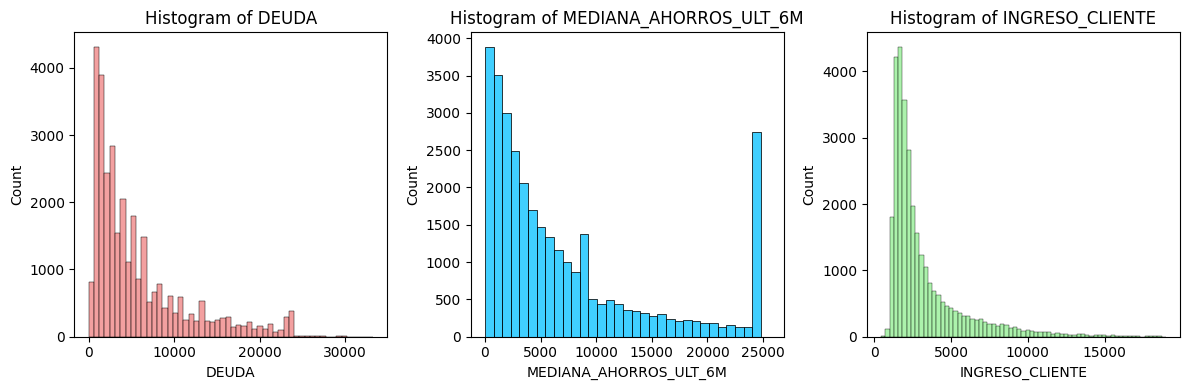

In [4]:
# declaring features to evaluate
selected_numeric_features = ['DEUDA', 'MEDIANA_AHORROS_ULT_6M', 'INGRESO_CLIENTE']

# creating colors
colors = ['lightcoral', 'deepskyblue', 'lightgreen']
# declaring fig and axis
fig, axis = plt.subplots(1, 3, figsize = (12, 4))

# iterating along selected features
for n_iter, (feature, color) in enumerate(zip(selected_numeric_features, colors)):
    # chossing axis
    ax = axis[n_iter]

    # removing outliers just for visualization purposes
    temp = data.loc[(data[feature] < data[feature].quantile(0.999))]

    # getting bins
    bins = np.histogram_bin_edges(a = temp.loc[~temp[feature].isnull(), feature].to_numpy(), bins = 'scott')
    # plotting histogram
    sns.histplot(data = temp,
                 x = feature,
                 bins = bins,
                 color = color,
                 ax = ax)
    # creating titles
    ax.set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* The three histograms are skewed to the right, which means we have more small clients rather than big ones.
* It can be observed that the cutoffs could be two based on their frequency.
* It would be naive to decide the segments just by looking at this univariate analysis, it is mandatory to check on the RD distribution.

To arrive at a decision we should verify how much they represent in terms of their amount and N. This approach is performed by calculating their deciles.

In [5]:
# creating percentiles
for feature in selected_numeric_features:
    # creating array 
    percentiles = num_data[feature].quantile([round(num, 1) for num in np.linspace(0.1, 0.9, 9)])\
                                   .to_dict()
        
    # rounding percentiles
    percentiles = {key: round(value / 50) * 50 for key, value in percentiles.items()}

    # creating choise list
    values = list(percentiles.values())

    # creating conditions
    conditions = [num_data[feature] <= value for value in values]
    
    # adding upper bound condition
    conditions += [num_data[feature] > values[-1]]

    choice_list = [f'[0 - {values[0]:,.0f}]']
    choice_list += [f'<{values[i]:,.0f} - {values[i + 1]:,.0f}]' for i in range(len(values) - 1)]
    choice_list += [f'<{values[-1]:,.0f} - +inf>']

    # creating new dict to map
    choice_list_dict = dict(zip(choice_list, list(percentiles.keys()) + [list(percentiles.keys())[-1] + 0.01]))

    # creating columns
    num_data[f'{feature}_percen_label'] = np.select(condlist = conditions,
                                                    choicelist = choice_list,
                                                    default = choice_list[0])
    
    num_data[f'{feature}_percen_value'] = num_data[f'{feature}_percen_label'].map(choice_list_dict)

An important view to select a proper segmentation is to analyze how ratio of default changes throughout the deciles does it

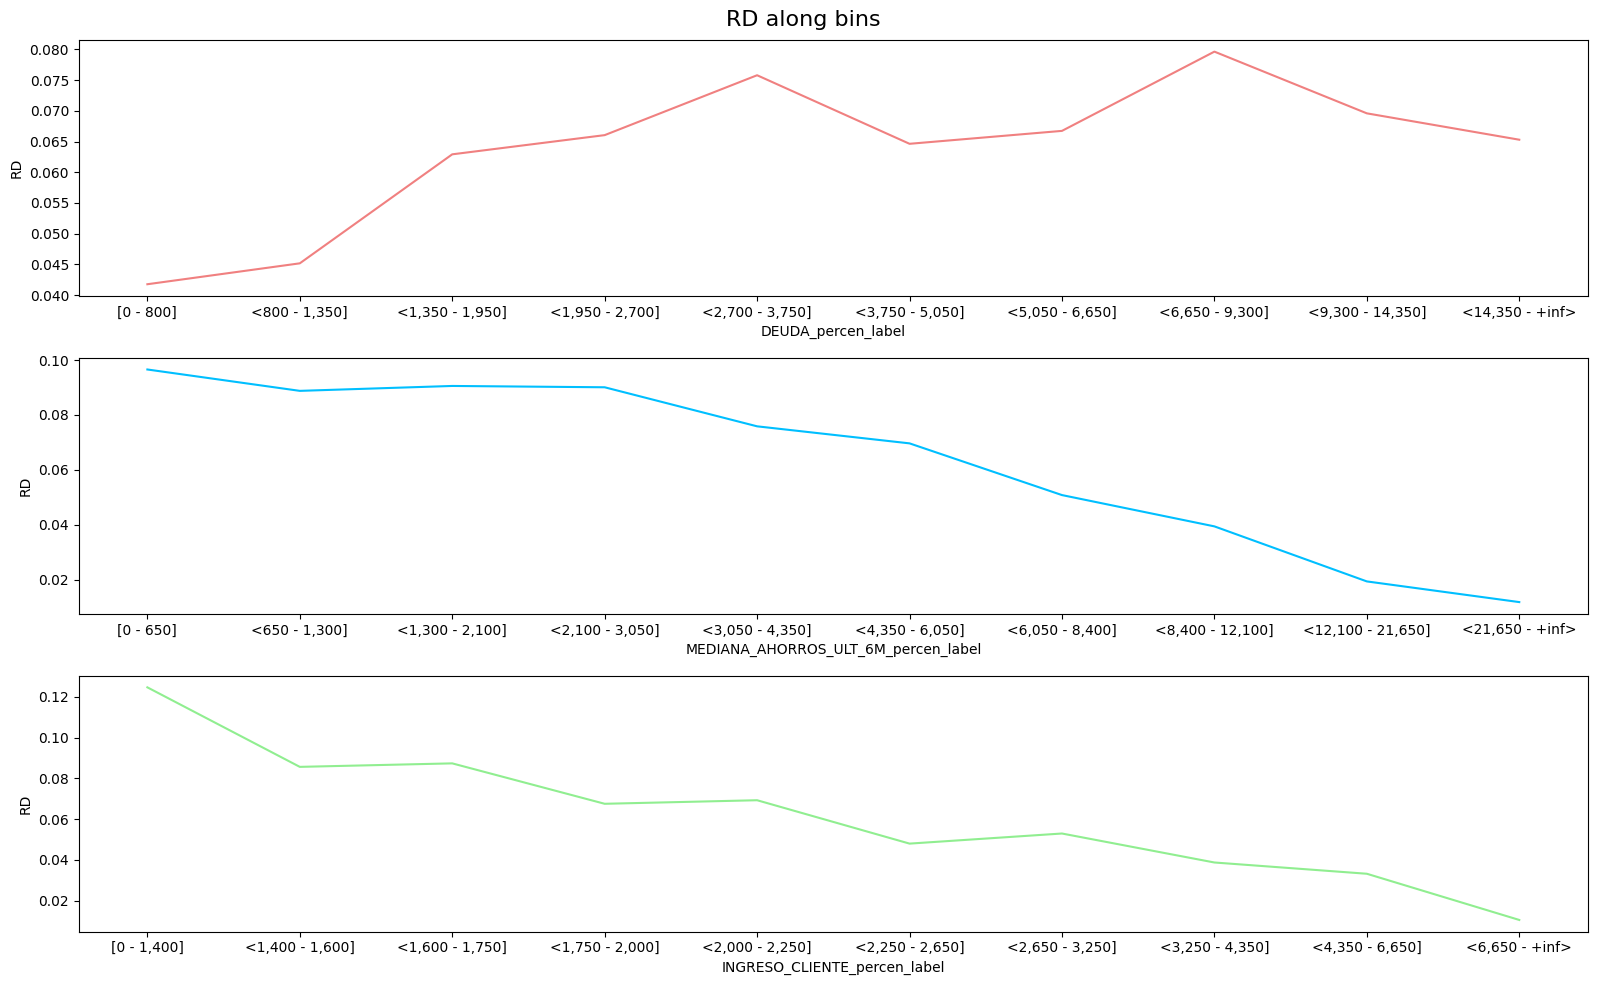

In [6]:
# declaring fig and axis
fig, axis = plt.subplots(3, 1, figsize = (16, 10))

# adding title
fig.suptitle('RD along bins', fontsize = 16)

# iterating along selected features
for n_iter, (feature, color) in enumerate(zip(selected_numeric_features, colors)):
    # selecting created features
    label = f'{feature}_percen_label'
    value = f'{feature}_percen_value'

    # getting labels
    labels = num_data[[value, label]].drop_duplicates()

    # grouping by values
    grouped = num_data.groupby(value, as_index = False)\
                      .agg({'FLG_DEFAULT_12M': 'mean'})
    
    # changing labels
    grouped = grouped.merge(right = labels,
                            on = [value],
                            how = 'left')\
                     .rename(columns = {'FLG_DEFAULT_12M': 'RD'})\
                     .drop(columns = value)
    
    # creating plot
    ax = axis[n_iter]
    sns.lineplot(data = grouped, x = label, y = 'RD', ax = ax, color = color)

    # changing axis
    ax.set_xticks(range(len(grouped[label])), grouped[label].tolist())
    ax.set_xticklabels(grouped[label].tolist(), rotation = 0)

plt.tight_layout()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* The RD changes properly according to their nested features inasmuch as debt, liabilities and credits are behaving correctly.
* It is observed that whereas clients have more income and saved money their probability of default decreases.
* Since the selected features make economic sense as expected, we can begin our segmentation by splitting the population using those features.

<span style="color:lightcoral; font-weight:bold;">Answer:</span>

The chosen features could be Debt, Liabilities and Incomes.

As it can be seen, this numeric features have the economic sense since the RD is changing properly according to their definition. Nevertheless, this is an univariate analysis, we cannot assure that this behavior will be the same for the rest of the features, this comes to second question of this section:

<span style="color:#B0E57C; font-weight:bold;">02. Do these numeric features represent their inner meaning on the entire population?</span>

In order to answer this subquestion, it is important verify the RD by creating a pivot table with those features as a first step.

In [7]:
# defining a function to pivot table
def pivot_table_with_labels(data, 
                            index_value, 
                            column_value,
                            index_label,
                            column_label,
                            values, 
                            aggfunc):
    

    row_label = dict(num_data[[index_value, index_label]].drop_duplicates()\
                                                         .sort_values(by = index_value)\
                                                         .to_dict('split')['data'])

    col_label = dict(num_data[[column_value, column_label]].drop_duplicates()\
                                                           .sort_values(by = column_value)\
                                                           .to_dict('split')['data'])
    pivot = pd.pivot_table(data = data,
                           index = index_value,
                           columns = column_value,
                           values = values,
                           aggfunc = aggfunc)\
              .sort_index(ascending = False)
    
    pivot.index = pivot.index.map(row_label)
    pivot.columns = pivot.columns.map(col_label)
    return pivot

Creating heatmaps to see how RD changes

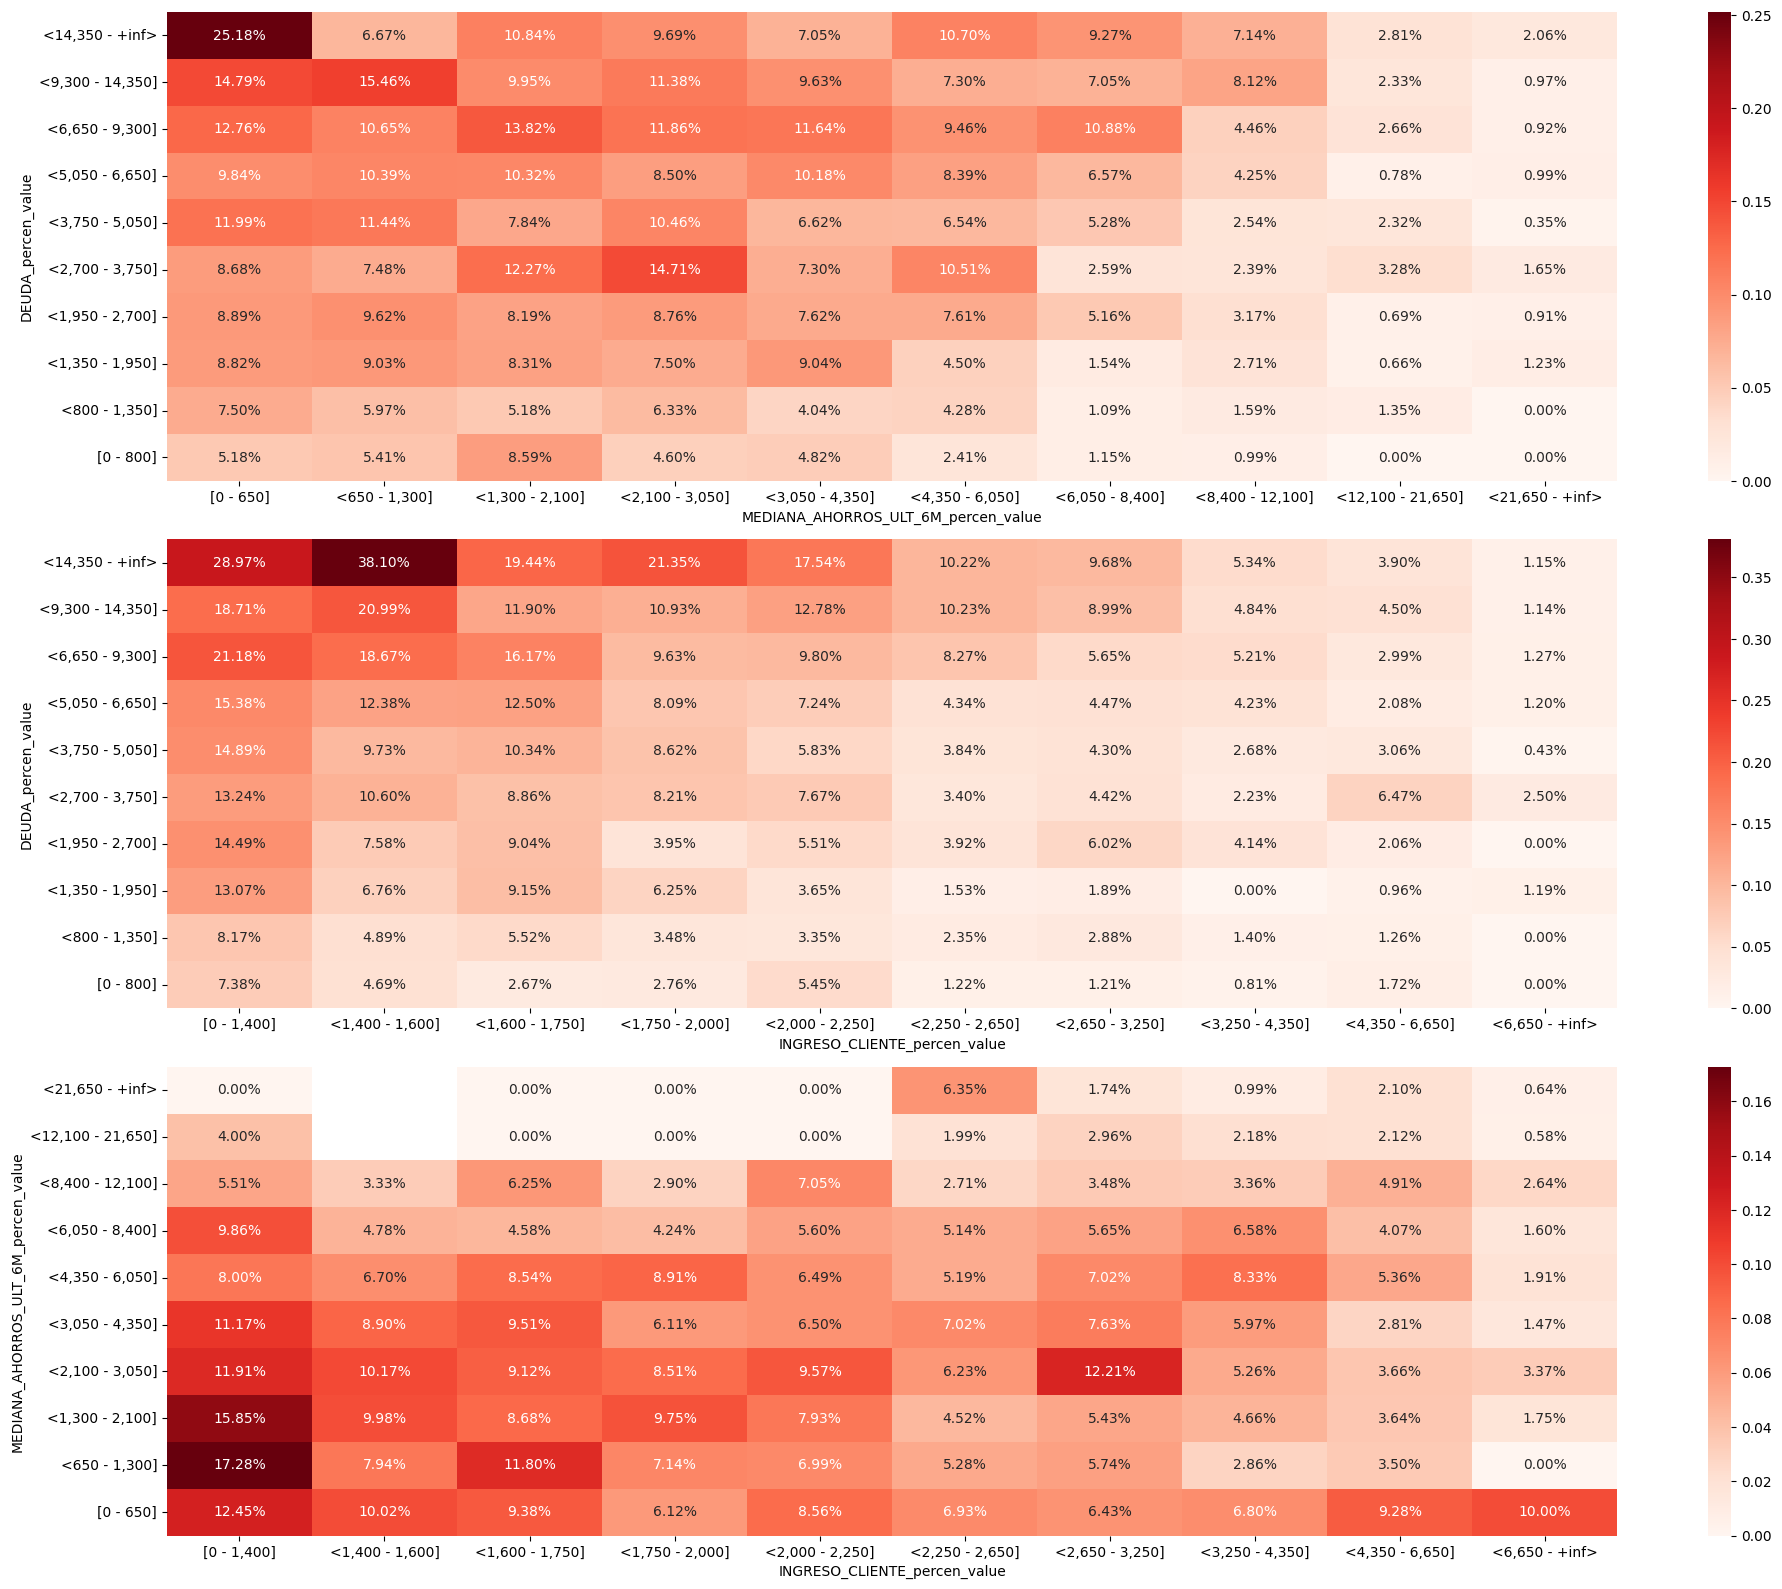

In [8]:
# creating combinations
combinations = [(selected_numeric_features[0], selected_numeric_features[1]),
                (selected_numeric_features[0], selected_numeric_features[2]),
                (selected_numeric_features[1], selected_numeric_features[2])]

# creating fig
fig, axis = plt.subplots(3, 1, figsize = (20, 16))

# iterating along combinations
for n_iter, (index, column) in enumerate(combinations):
    # creating index and columns
    index_value = f'{index}_percen_value'
    index_label = f'{index}_percen_label'
    column_value = f'{column}_percen_value'
    column_label = f'{column}_percen_label'

    # generating pivot table
    pivot = pivot_table_with_labels(data = num_data,
                                    index_value = index_value,
                                    column_value = column_value,
                                    index_label = index_label,
                                    column_label = column_label,
                                    values = 'FLG_DEFAULT_12M',
                                    aggfunc = 'mean')
    
    # creating axis
    ax = axis[n_iter]

    # generating plot
    sns.heatmap(data = pivot,
                fmt = '.2%',
                annot = True,
                cmap = 'Reds',
                ax = ax)
    # Rotating x-axis labels horizontally
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)    
    
plt.tight_layout()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* It can be appreciated that having so much debt does not necessarily mean that the risk will increase. Upon examining the first pivot table, we observe that is also connected to the client's liabilities, if they have sufficient money in their bank account they can manage to have as much debt as their risk tendency allows it.
* The previous behavior is replicated on the rest of the tables. In spite of being useful to begin segmenting, it is mandatory to analyze other aggregations and features as well.

Other important view could be the materiality of our leads we have in each cell.

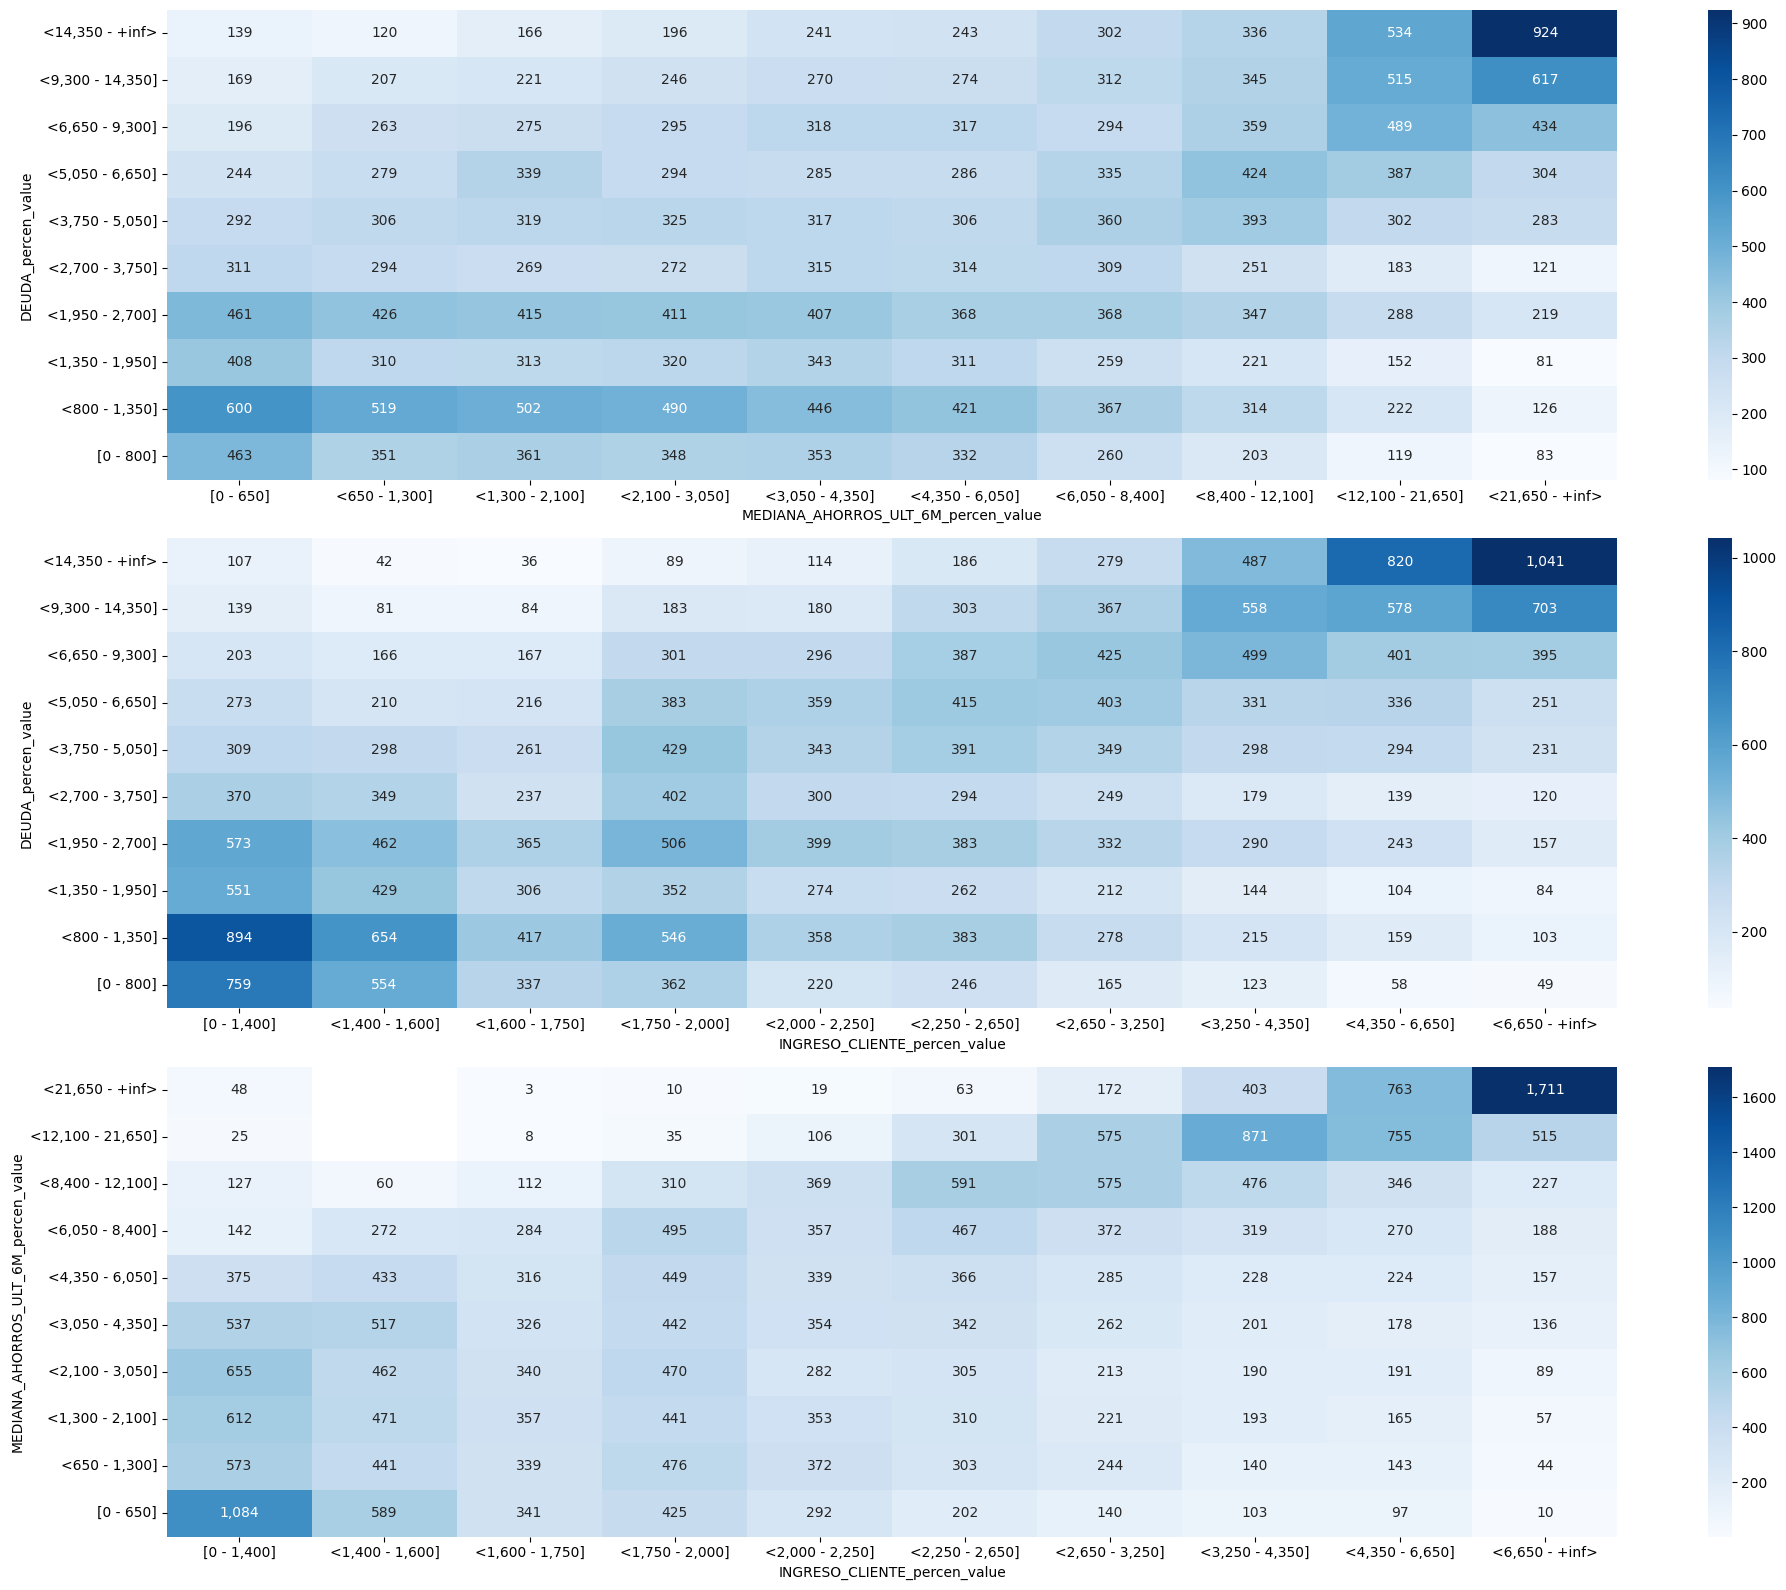

In [21]:
# creating combinations
combinations = [(selected_numeric_features[0], selected_numeric_features[1]),
                (selected_numeric_features[0], selected_numeric_features[2]),
                (selected_numeric_features[1], selected_numeric_features[2])]

# creating fig
fig, axis = plt.subplots(3, 1, figsize = (20, 16))

# iterating along combinations
for n_iter, (index, column) in enumerate(combinations):
    # creating index and columns
    index_value = f'{index}_percen_value'
    index_label = f'{index}_percen_label'
    column_value = f'{column}_percen_value'
    column_label = f'{column}_percen_label'

    # generating pivot table
    pivot = pivot_table_with_labels(data = num_data,
                                    index_value = index_value,
                                    column_value = column_value,
                                    index_label = index_label,
                                    column_label = column_label,
                                    values = 'CODSOLICITUD',
                                    aggfunc = 'count')
    
    # creating axis
    ax = axis[n_iter]

    # generating plot
    sns.heatmap(data = pivot,
                fmt = ',.0f',
                annot = True,
                cmap = 'Blues',
                ax = ax)
    # Rotating x-axis labels horizontally
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)    
    
plt.tight_layout()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* The population is well distributed, this might occur because of the decil cutoff previously performed. We have enough leads to start selecting the proper intervals.

<span style="color:lightcoral; font-weight:bold;">Answer:</span>

No, they inner meaning makes sense to their concept but they need to be treated as part of something bigger.

As it can be observed, it is not cause and effect that a single feature represents the RD behavior. Therefore, we should use other variables to determine how to split the universe. It is important to remark that a feature to segment does not have to be treated as one used to train the model, the followind would be:

<span style="color:#B0E57C; font-weight:bold;">03. What other features do we should use to segment and to aggregate?</span>

Another approach to segmentation is to create relative features, such as The Share of Wallet (Sow), which in this case would represent the proportion of the client's debt that is owed to us compared to their total debt within the financial system.

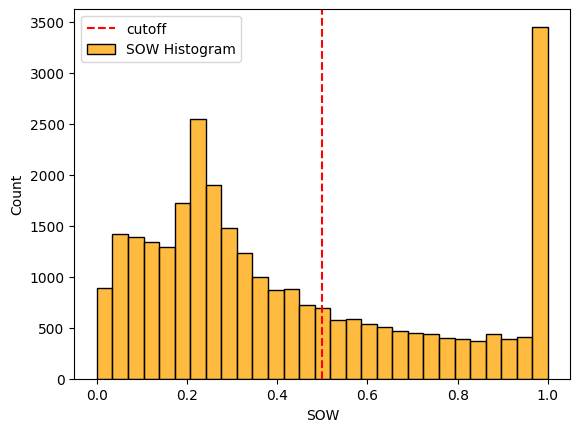

In [9]:
# create feature for SoW
num_data['SOW'] = num_data['DEUDA'] / (num_data['DEUDA'] + num_data['DEUDA_TOTAL_SISTEMA'])

# Visualize distribution
# calculate bins 
bins = np.histogram_bin_edges(a = num_data.loc[~num_data['SOW'].isnull(), 'SOW'].to_numpy(), bins = 'scott')

sns.histplot(data = num_data, x = 'SOW',bins = bins, color = 'orange', label = 'SOW Histogram')
plt.axvline(x = 0.5, ls = '--', color = 'red', label = 'cutoff')
plt.legend()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* We can create two groups by looking at the histogram. It can be seen two sides at 0.5 percentage, so there is where we leave a cutoff.

In order to validate how "SOW" ranks our target along itself and with the previously selected features, we need to cross them into a tab.

In [10]:
# create label and value
dict_sow = {'[0 - 0.5]': 0,
            '<0.5 - 1.0]': 1}

# generate features
num_data['SOW_percen_label'] = np.select(condlist = [num_data['SOW'] <= 0.5, num_data['SOW'] > 0.5],
                                         choicelist = list(dict_sow.keys()),
                                         default = list(dict_sow.keys())[0])

num_data['SOW_percen_value'] = num_data['SOW_percen_label'].map(dict_sow)

Evaluating RD with the previous features

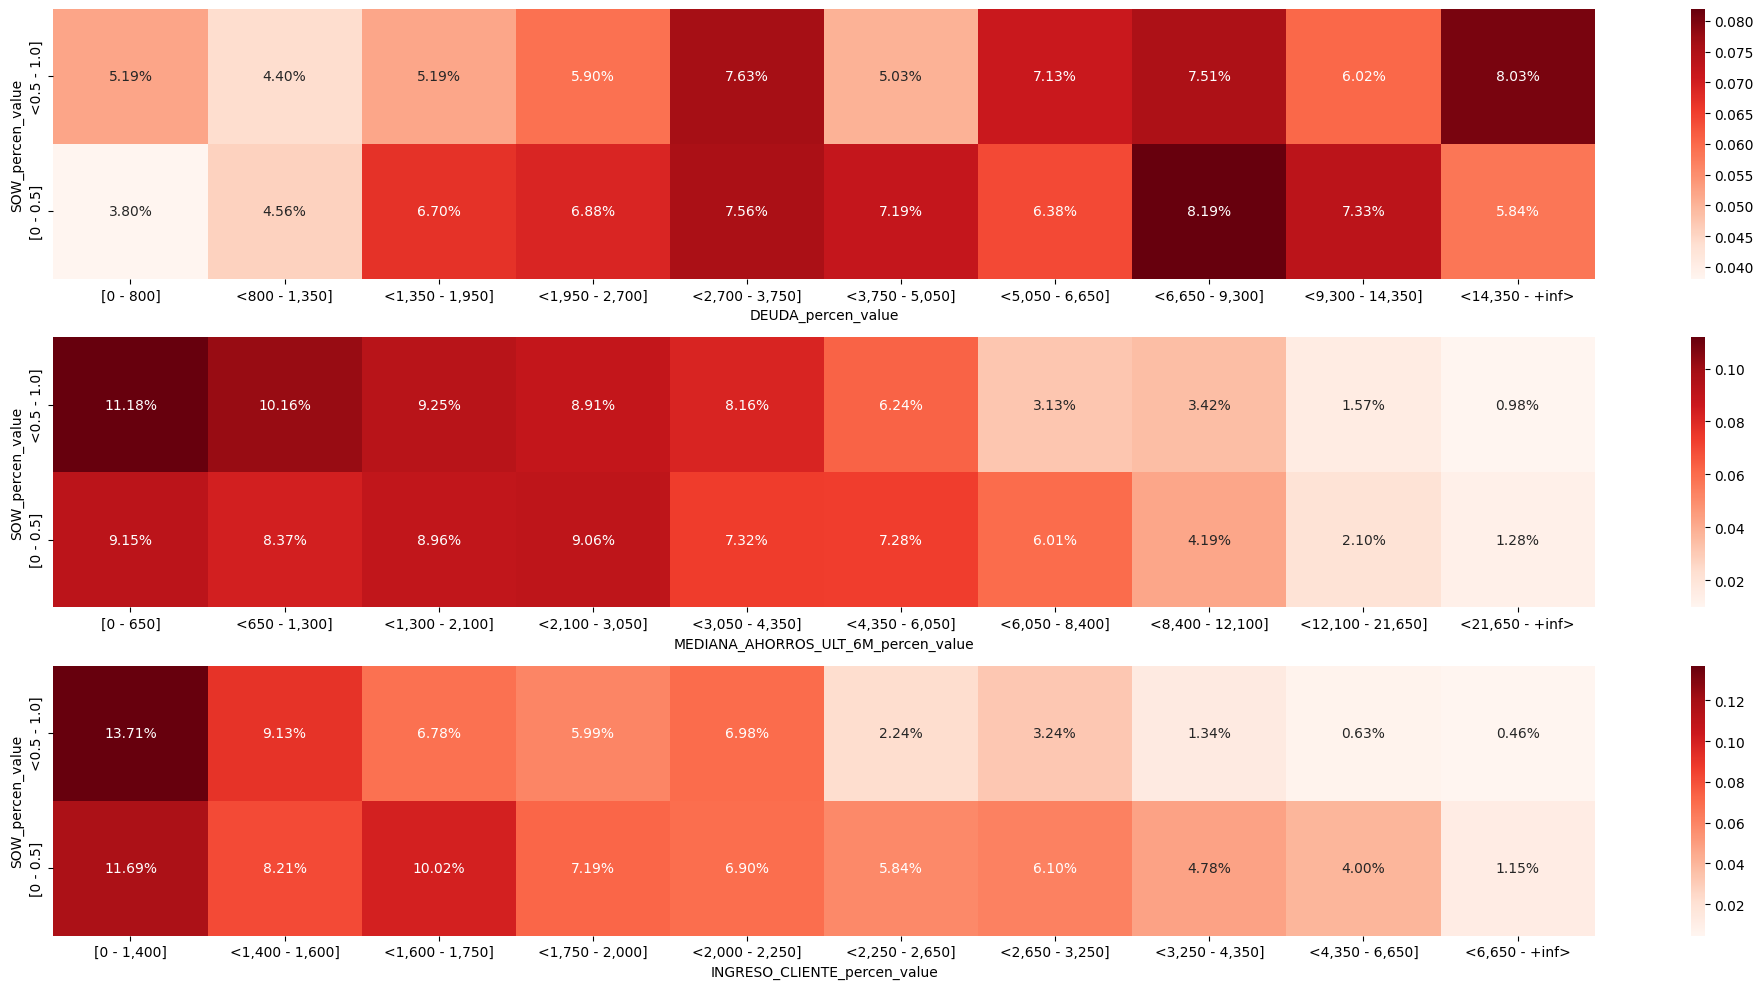

In [11]:
# creating combinations
combinations = [('SOW', selected_numeric_features[0]),
                ('SOW', selected_numeric_features[1]),
                ('SOW', selected_numeric_features[2])]

# creating fig
fig, axis = plt.subplots(3, 1, figsize = (20, 10))

# iterating along combinations
for n_iter, (index, column) in enumerate(combinations):
    # creating index and columns
    index_value = f'{index}_percen_value'
    index_label = f'{index}_percen_label'
    column_value = f'{column}_percen_value'
    column_label = f'{column}_percen_label'

    # generating pivot table
    pivot = pivot_table_with_labels(data = num_data,
                                    index_value = index_value,
                                    column_value = column_value,
                                    index_label = index_label,
                                    column_label = column_label,
                                    values = 'FLG_DEFAULT_12M',
                                    aggfunc = 'mean')
    
    # creating axis
    ax = axis[n_iter]

    # generating plot
    sns.heatmap(data = pivot,
                fmt = '.2%',
                annot = True,
                cmap = 'Reds',
                ax = ax)
    # Rotating x-axis labels horizontally
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)    
    
plt.tight_layout()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* There is no big difference between debt and liabilities, however, it is clear that this new feature sorts incomes more efficiently, therefore it should be used right after this variable.
* In terms of begin a segmentation, Debt, Liabilities, Incomes and SoW are well fitted. We should see other aggregations to continue supporting this statement.

We have 4 features to segment and 2 for aggregations so far. Now, it would be relevant to observe how old are our clients in each cell box in order to give them a loan and expect to get paid.

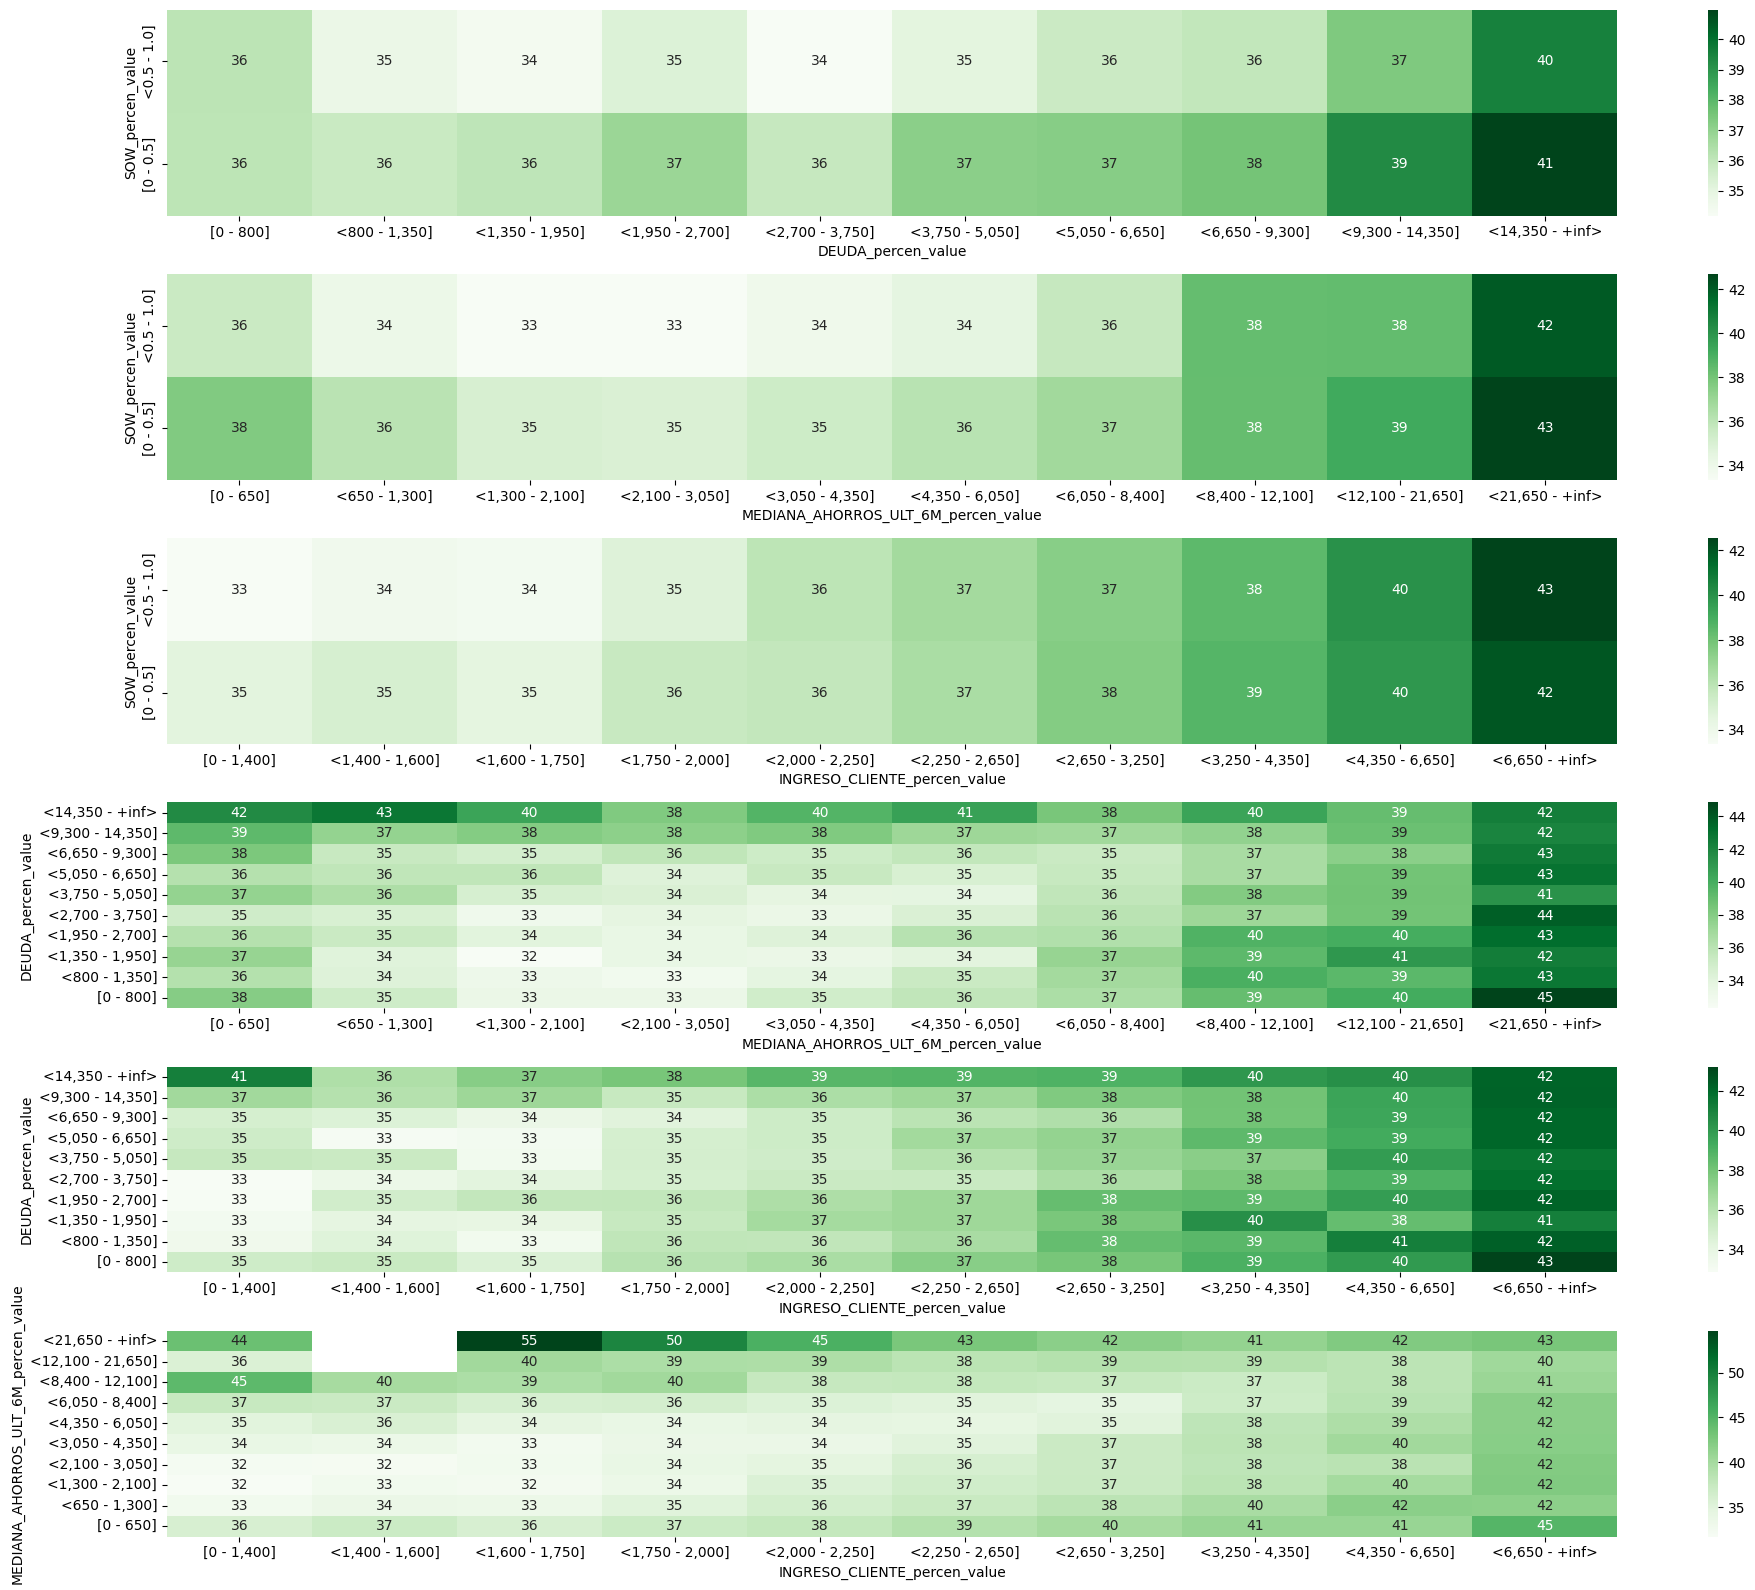

In [26]:
# creating combinations
combinations = [('SOW', selected_numeric_features[0]),
                ('SOW', selected_numeric_features[1]),
                ('SOW', selected_numeric_features[2]),
                (selected_numeric_features[0], selected_numeric_features[1]),
                (selected_numeric_features[0], selected_numeric_features[2]),
                (selected_numeric_features[1], selected_numeric_features[2])]

# creating fig
fig, axis = plt.subplots(6, 1, figsize = (20, 16))

# iterating along combinations
for n_iter, (index, column) in enumerate(combinations):
    # creating index and columns
    index_value = f'{index}_percen_value'
    index_label = f'{index}_percen_label'
    column_value = f'{column}_percen_value'
    column_label = f'{column}_percen_label'

    # generating pivot table
    pivot = pivot_table_with_labels(data = num_data,
                                    index_value = index_value,
                                    column_value = column_value,
                                    index_label = index_label,
                                    column_label = column_label,
                                    values = 'EDAD_T',
                                    aggfunc = 'mean')
    
    # creating axis
    ax = axis[n_iter]

    # generating plot
    sns.heatmap(data = pivot,
                fmt = '.0f',
                annot = True,
                cmap = 'Greens',
                ax = ax)
    # Rotating x-axis labels horizontally
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)    
    
plt.tight_layout()
plt.show()

<span style="color:#D8B0E5; font-weight:bold;">Observations:</span>

* It is particulary sensible that the higher values correspond to how old the client is. This first cutoff could be done at the sixth decil.
* The ages are not separated completely, the average seems to be 33.

<span style="color:lightcoral; font-weight:bold;">Answer:</span>

The new selected feature would be the created "SOW" and the aggregation would be the age.

After analyzing all the features we have discussed so far, we have identified those that could be used to segment the dataset and those that should be employed to assess the economic viability of our approach. However, despite creating deciles or intervals as a starting point, we have not yet reached a final conclusion. This will be answered in the following appendix.